In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

%matplotlib inline

# Part 1: Prediction Result

In [2]:
pred = pd.read_csv('pred2/pred_accuracy.csv')
pred.head()

,location,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM,XGBoost,best,sig
0,5,660.733618,360.300285,423.488557,530.940868,284.342552,923.595662,LSTM,True
1,6,520.571453,327.748727,396.486996,407.171659,243.284027,1104.817177,LSTM,True
2,7,277.951764,179.614087,209.257630,226.013806,172.638283,394.805937,LSTM,False
3,31,511.515018,360.003204,328.671785,306.175995,227.402424,238.655428,LSTM,False
4,54,117.221866,116.518062,85.684484,86.202741,46.851449,79.381576,LSTM,True


### 1. Statistics of predictions

In [3]:
pred_res = pd.DataFrame(index = ('best_count', 'best_ratio', 'sig_count', 'sig_ratio'),
                        columns = ('Naive', 'Moving_Average', 'Expoential_Smoothing', 
                                   'SARIMA', 'LSTM', 'XGBoost', 'sum'))

In [4]:
pred_res.loc['best_count']['Naive'] = pred.loc[pred.best == 'Naive']['best'].count()
pred_res.loc['best_count']['Moving_Average'] = pred.loc[pred.best == 'avg']['best'].count()
pred_res.loc['best_count']['Expoential_Smoothing'] = pred.loc[pred.best == 'Holt_Winter']['best'].count()
pred_res.loc['best_count']['SARIMA'] = pred.loc[pred.best == 'SARIMA']['best'].count()
pred_res.loc['best_count']['LSTM'] = pred.loc[pred.best == 'LSTM']['best'].count()
pred_res.loc['best_count']['XGBoost'] = pred.loc[pred.best == 'XGBoost']['best'].count()
pred_res.loc['best_count']['sum'] = pred['best'].count()

pred_res.loc['best_ratio']['Naive'] = pred.loc[pred.best == 'Naive']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['Moving_Average'] = pred.loc[pred.best == 'avg']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['Expoential_Smoothing'] = pred.loc[pred.best == 'Holt_Winter']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['SARIMA'] = pred.loc[pred.best == 'SARIMA']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['LSTM'] = pred.loc[pred.best == 'LSTM']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['XGBoost'] = pred.loc[pred.best == 'XGBoost']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['sum'] = 1

pred_res.loc['sig_count']['Naive'] = pred.loc[(pred.best == 'Naive') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['Moving_Average'] = pred.loc[(pred.best == 'avg') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['Expoential_Smoothing'] = pred.loc[(pred.best == 'Holt_Winter') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['SARIMA'] = pred.loc[(pred.best == 'SARIMA') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['LSTM'] = pred.loc[(pred.best == 'LSTM') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['XGBoost'] = pred.loc[(pred.best == 'XGBoost') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['sum'] = pred.loc[pred.sig == True]['best'].count()

pred_res.loc['sig_ratio']['Naive'] = pred.loc[(pred.best == 'Naive') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['Moving_Average'] = pred.loc[(pred.best == 'avg') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['Expoential_Smoothing'] = pred.loc[(pred.best == 'Holt_Winter') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['SARIMA'] = pred.loc[(pred.best == 'SARIMA') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['LSTM'] = pred.loc[(pred.best == 'LSTM') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['XGBoost'] = pred.loc[(pred.best == 'XGBoost') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['sum'] = 1

pred_res

,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM,XGBoost,sum
best_count,0,6,7,4,214,73,304
best_ratio,0.0,0.019737,0.023026,0.013158,0.703947,0.240132,1
sig_count,0,1,2,0,140,36,179
sig_ratio,0.0,0.005587,0.011173,0.000000,0.782123,0.201117,1


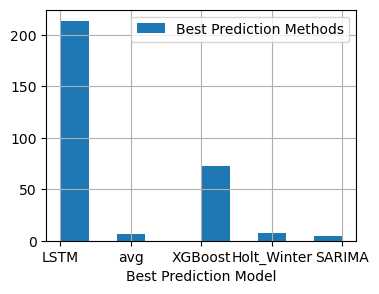

In [5]:
plt.style.use('default')

pred['best'].hist(label = 'Best Prediction Methods',figsize = (4,3))
#pred.loc[pred.sig == True]['best'].hist(label = 'Significant',figsize = (4,3))
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

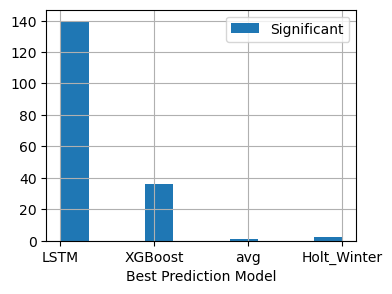

In [6]:
#pred['best'].hist(label = 'Best Prediction Methods',figsize = (4,3))
pred.loc[pred.sig == True]['best'].hist(label = 'Significant',figsize = (4,3))
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

### 2. Distributions of FF in Locations with Diff Best Models (satisfied significance)

In [7]:
ff = pd.read_csv('stackfootfall.csv')
ff = ff.drop(columns=['Unnamed: 0'])
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [8]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

In [9]:
comp = pred[['location','best','sig']]

In [10]:
ff = pd.merge(ff, comp, how = 'inner', on = 'location')
ff.head()

,timestamp,location,device,footfall,year,month,day,hour,day_of_week,best,sig
0,2018-01-01 00:00:00,5.0,1780.0,494.0,2018,1,1,0,1,LSTM,True
1,2018-01-01 01:00:00,5.0,1780.0,899.0,2018,1,1,1,1,LSTM,True
2,2018-01-01 02:00:00,5.0,1780.0,770.0,2018,1,1,2,1,LSTM,True
3,2018-01-01 03:00:00,5.0,1780.0,599.0,2018,1,1,3,1,LSTM,True
4,2018-01-01 04:00:00,5.0,1780.0,331.0,2018,1,1,4,1,LSTM,True


Text(0.5, 0, 'Hour')

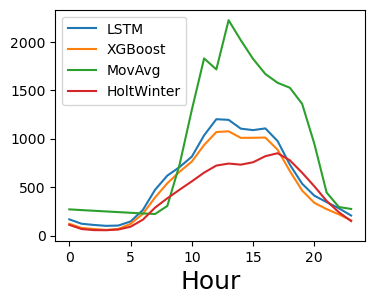

In [11]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Hour', fontsize=18)

Text(0.5, 0, 'Day of Week')

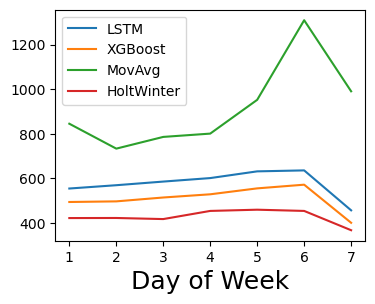

In [12]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Day of Week', fontsize=18)

Text(0.5, 0, 'Month')

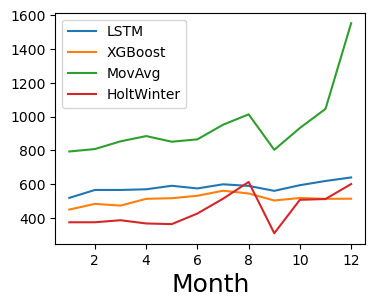

In [13]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Month', fontsize=18)

In [14]:
ff_LSTM = ff.loc[(ff.best == 'LSTM') & (ff.sig == True)]
ff_XGBoost = ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)]
ff_MovAvg = ff.loc[(ff.best == 'avg') & (ff.sig == True)]
ff_SARIMA = ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)]
ff_HoltWinter = ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)]
ff_Naive = ff.loc[(ff.best == 'Naive') & (ff.sig == True)]

ff_LSTMsum = ff_LSTM.groupby('timestamp')['footfall'].mean().to_frame()
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()
ff_XGBoostsum = ff_XGBoost.groupby('timestamp')['footfall'].mean().to_frame()

In [15]:
daily_LSTM = ff_LSTMsum.resample('D').mean()
weekly_LSTM = ff_LSTMsum.resample('W').mean()
monthly_LSTM = ff_LSTMsum.resample('M').mean()

daily_MovAvg = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg = ff_MovAvgsum.resample('M').mean()

daily_SARIMA = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter = ff_HoltWintersum.resample('M').mean()

daily_Naive = ff_Naivesum.resample('D').mean()
weekly_Naive = ff_Naivesum.resample('W').mean()
monthly_Naive = ff_Naivesum.resample('M').mean()

daily_XGBoost = ff_XGBoostsum.resample('D').mean()
weekly_XGBoost = ff_XGBoostsum.resample('W').mean()
monthly_XGBoost = ff_XGBoostsum.resample('M').mean()

In [16]:
daily_LSTM['LSTM'] = ff_LSTMsum.resample('D').mean()
weekly_LSTM['LSTM'] = ff_LSTMsum.resample('W').mean()
monthly_LSTM['LSTM'] = ff_LSTMsum.resample('M').mean()

daily_XGBoost['XGBoost'] = ff_XGBoostsum.resample('D').mean()
weekly_XGBoost['XGBoost'] = ff_XGBoostsum.resample('W').mean()
monthly_XGBoost['XGBoost'] = ff_XGBoostsum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

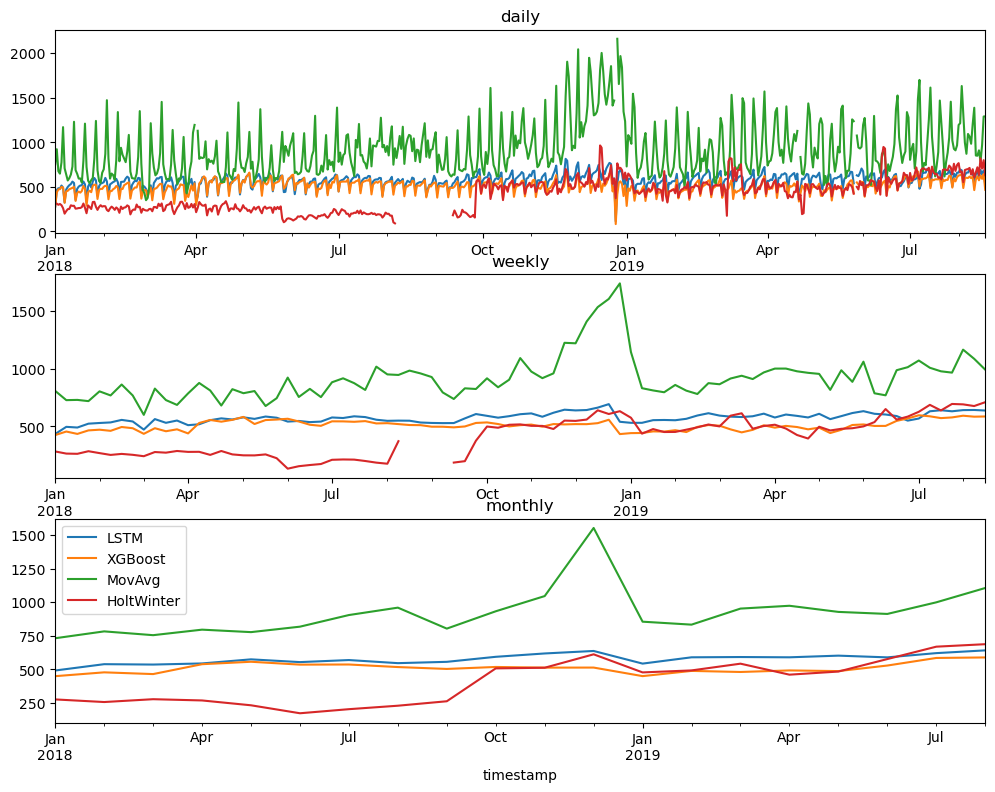

In [17]:
fig,axs = plt.subplots(3,1)

daily_LSTM['LSTM'].plot(figsize = (12,9),title = 'daily', label = 'LSTM', ax = axs[0])
daily_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'daily', label = 'XGBoost', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
#daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA', ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter', ax = axs[0])
#daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])

weekly_LSTM['LSTM'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
#weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
#weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_LSTM['LSTM'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
#monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
#monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')

# Part 2: Spatial Analysis

In [72]:
meta = pd.read_csv('meta/ff_locations.csv')

In [73]:
meta_loc = pd.merge(comp, meta, how = 'inner', on = 'location')
meta_loc

,location,best,sig,address,city,region,lat,lon,position,type
0,5,LSTM,True,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49273,-0.22426,King Street entrance,External
1,6,LSTM,True,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49215,-0.22356,Hammersmith Underground Station - Talgarth Roa...,External
2,7,LSTM,False,"Unit 13-16, Hammersmith Broadway Shopping Cent...",London,Greater London,51.49171,-0.22361,Talgarth Road entrance,External
3,31,LSTM,False,"Unit 3, Coppergate Shopping Centre, St. Marys ...",York,Yorkshire and the Humber,53.95737,-1.07965,Topshop,External
4,54,LSTM,True,"12 The Square, Market Harborough, LE16 7PA, Ea...",Market Harborough,East Midlands,52.47776,-0.92009,NaN,External
...,...,...,...,...,...,...,...,...,...,...
299,1165,LSTM,False,"40 West Street, Dorking, RH4 1BU, South East",Dorking,South East,51.23186,-0.33629,NaN,External
300,1119,LSTM,False,"26-28 The Moor, Sheffield, S1 4PA, Yorkshire a...",Sheffield,Yorkshire and the Humber,53.37705,-1.47288,NaN,External
301,1166,LSTM,False,"149-151 Victoria Street, London, SW1E 5NH, Gre...",London,Greater London,51.49683,-0.13995,NaN,External
302,1167,LSTM,False,"Unit LM08, Intu Victoria Centre, Victoria Cent...",Nottingham,East Midlands,52.95720,-1.14727,NaN,External


In [74]:
meta_loc.to_csv('pred2/loc_meta.csv')

### 1. Combine Roads

In [75]:
nearest_road = pd.read_csv('pred2/nearest_road.csv')[['location', 'best', 'sig', 'address', 'city', 'region',
       'position', 'NEAR_DIST', 'NEAR_FC']]

In [76]:
for i in range(len(nearest_road)):
    nearest_road['NEAR_FC'][i] = nearest_road['NEAR_FC'][i][14:]
    nearest_road['NEAR_DIST'][i] *= 1000
nearest_road.head()

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,best,sig,address,city,region,position,NEAR_DIST,NEAR_FC
0,5,LSTM,True,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,King Street entrance,0.249989,A_Road
1,6,LSTM,True,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,Hammersmith Underground Station - Talgarth Roa...,0.085263,Local_Road
2,7,LSTM,False,"Unit 13-16, Hammersmith Broadway Shopping Cent...",London,Greater London,Talgarth Road entrance,0.087891,A_Road
3,31,LSTM,False,"Unit 3, Coppergate Shopping Centre, St. Marys ...",York,Yorkshire and the Humber,Topshop,0.121614,Local_Road
4,54,LSTM,True,"12 The Square, Market Harborough, LE16 7PA, Ea...",Market Harborough,East Midlands,,0.182149,A_Road


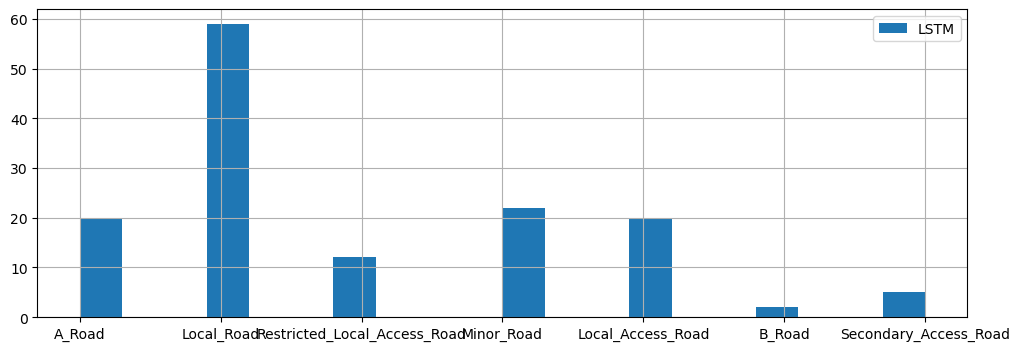

In [77]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'LSTM')]['NEAR_FC'].hist(label = 'LSTM', bins = 20)

plt.legend(loc = 'best')

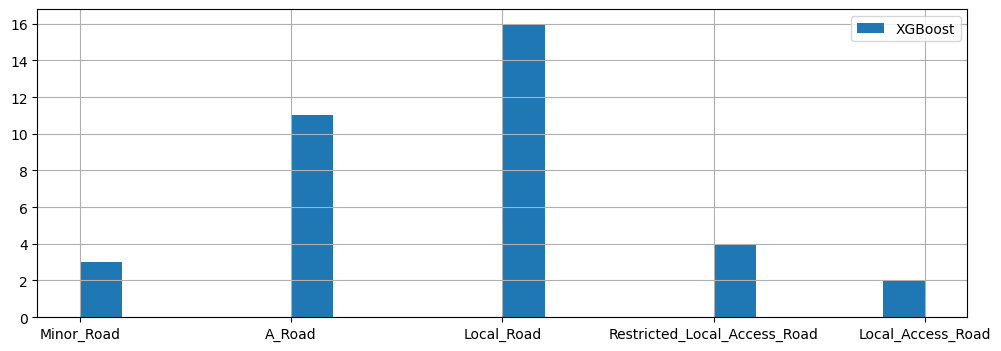

In [78]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'XGBoost')]['NEAR_FC'].hist(label = 'XGBoost', bins = 20)

plt.legend(loc = 'best')

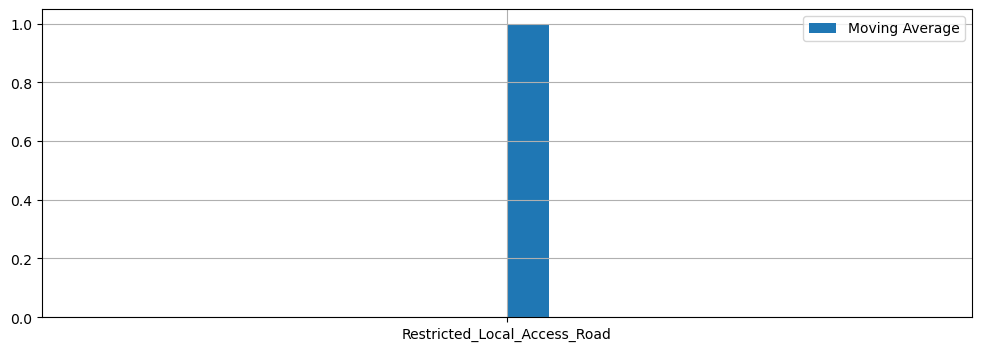

In [79]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'avg')]['NEAR_FC'].hist(label = 'Moving Average', bins = 20)

plt.legend(loc = 'best')

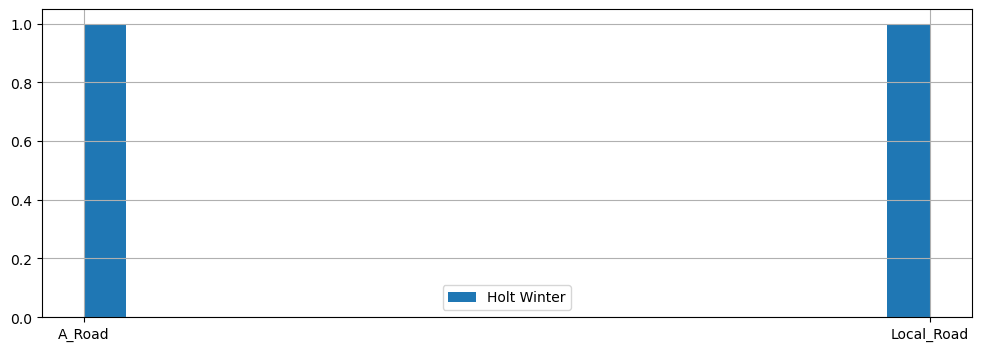

In [80]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'Holt_Winter')]['NEAR_FC'].hist(label = 'Holt Winter', bins = 20)

plt.legend(loc = 'best')

In [81]:
loc_A_Road = pd.read_csv('pred2/dist_a_road.csv')
loc_B_Road = pd.read_csv('pred2/dist_b_road.csv')
loc_Local_Access_Road = pd.read_csv('pred2/dist_local_access_road.csv')
loc_Local_Road = pd.read_csv('pred2/dist_local_road.csv')
loc_Minor_Road = pd.read_csv('pred2/dist_minor_road.csv')
loc_Motorway = pd.read_csv('pred2/dist_motorway.csv')
loc_Restricted_Local_Access_Road = pd.read_csv('pred2/dist_restricted_local_access_road.csv')
loc_Secondary_Access_Road = pd.read_csv('pred2/dist_secondary_access_road.csv')

In [82]:
nearest_road['dist_A'] = loc_A_Road['NEAR_DIST'] * 1000
nearest_road['dist_B'] = loc_B_Road['NEAR_DIST'] * 1000
nearest_road['dist_Minor'] = loc_Minor_Road['NEAR_DIST'] * 1000

nearest_road['dist_Local'] = loc_Local_Road['NEAR_DIST'] * 1000
nearest_road['dist_Local_Access'] = loc_Local_Access_Road['NEAR_DIST'] * 1000
nearest_road['dist_Sec_Access'] = loc_Secondary_Access_Road['NEAR_DIST'] * 1000
nearest_road['dist_Res_Local_Access'] = loc_Restricted_Local_Access_Road['NEAR_DIST'] * 1000

nearest_road['dist_Motorway'] = loc_Motorway['NEAR_DIST'] * 1000

In [104]:
col = ['location', 'best', 'dist_A', 'dist_B', 'dist_Minor', 'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
       'dist_Res_Local_Access' ,'dist_Motorway']

In [105]:
loc_roads = nearest_road.loc[nearest_road.sig == True][col]
loc_roads

,location,best,dist_A,dist_B,dist_Minor,dist_Local,dist_Local_Access,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway
0,5,LSTM,0.249989,8.183310,15.845292,0.343351,9.119249,7.121891,1.672632,52.418194
1,6,LSTM,0.283125,8.971344,15.829665,0.085263,8.733550,6.263092,0.841378,53.081041
4,54,LSTM,0.182149,1.745995,1.577213,0.490657,9.322447,2.950578,947.071791,256.743040
5,62,LSTM,0.154238,8.773683,15.859061,0.231139,8.933722,6.448961,1.034977,52.907605
6,78,LSTM,0.156842,8.516844,15.774605,0.331833,9.208406,6.805659,1.317535,52.715687
...,...,...,...,...,...,...,...,...,...,...
291,1117,LSTM,1.095582,4.615151,1.129827,0.183936,0.771501,0.175971,1.311650,139.559269
293,1157,LSTM,0.039290,17.060939,3.042075,0.504838,5.715753,3.413476,95.990978,68.794327
294,1158,XGBoost,0.957827,18.416176,3.652482,0.386081,5.743590,2.477035,96.931160,70.015008
296,1161,LSTM,1.221016,13.536819,1.894142,0.096232,3.234551,2.907094,94.147655,65.860329


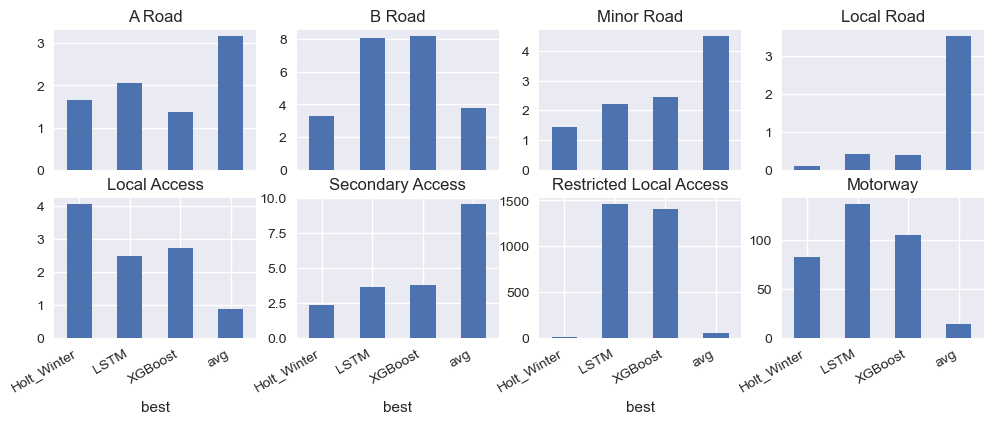

In [85]:
plt.style.use('seaborn')
fig,axs = plt.subplots(2,4)

loc_roads.groupby('best').mean()['dist_A']\
.plot(figsize=(12,4),title = 'A Road', kind='bar',ax = axs[(0,0)]).xaxis.set_visible(False)

loc_roads.groupby('best').mean()['dist_B']\
.plot(kind='bar',title = 'B Road',ax = axs[(0,1)]).xaxis.set_visible(False)

loc_roads.groupby('best').mean()['dist_Minor']\
.plot(kind='bar',title = 'Minor Road',ax = axs[(0,2)]).xaxis.set_visible(False)

loc_roads.groupby('best').mean()['dist_Local']\
.plot(kind='bar',title = 'Local Road',ax = axs[(0,3)]).xaxis.set_visible(False)

loc_roads.groupby('best').mean()['dist_Local_Access']\
.plot(kind='bar',title = 'Local Access',ax = axs[(1,0)])

loc_roads.groupby('best').mean()['dist_Sec_Access']\
.plot(kind='bar',title = 'Secondary Access',ax = axs[(1,1)])

loc_roads.groupby('best').mean()['dist_Res_Local_Access']\
.plot(kind='bar',title = 'Restricted Local Access',ax = axs[(1,2)])

loc_roads.groupby('best').mean()['dist_Motorway']\
.plot(kind='bar',title = 'Motorway',ax = axs[(1,3)], ).set_xlabel('')
axs[(1,0)].set_xticklabels(axs[(1,0)].get_xticklabels(), rotation=30, ha='right')
axs[(1,1)].set_xticklabels(axs[(1,1)].get_xticklabels(), rotation=30, ha='right')
axs[(1,2)].set_xticklabels(axs[(1,2)].get_xticklabels(), rotation=30, ha='right')
axs[(1,3)].set_xticklabels(axs[(1,3)].get_xticklabels(), rotation=30, ha='right')

plt.show()

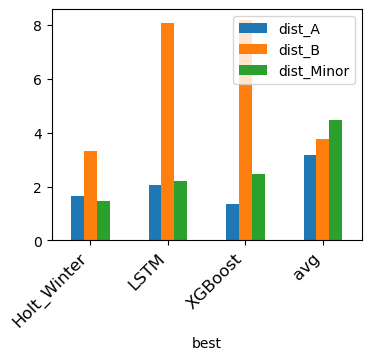

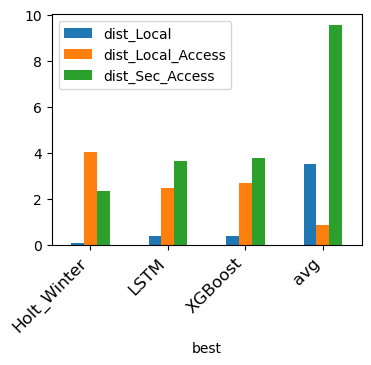

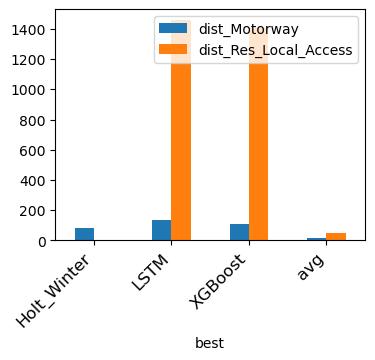

In [86]:
plt.style.use('default')
loc_roads.groupby('best')\
.mean()[['dist_A', 'dist_B', 'dist_Minor']].plot(figsize = (4,3), kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

loc_roads.groupby('best')\
.mean()[['dist_Local', 'dist_Local_Access', 'dist_Sec_Access']].plot(figsize = (4,3), kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

loc_roads.groupby('best')\
.mean()[['dist_Motorway', 'dist_Res_Local_Access']].plot(figsize = (4,3), kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

## Land Use

In [106]:
loc_OAC = pd.read_csv('pred2/loc_OAC.csv')
loc_landuse = pd.merge(loc_roads, loc_OAC, how = 'inner', on = 'location')

In [107]:
for i in range(len(loc_landuse['SPRGRP'])): 
    if loc_landuse['SPRGRP'][i] == 1:
        loc_landuse['SPRGRP'][i] = 'Rural residents'
    elif loc_landuse['SPRGRP'][i] == 2:
        loc_landuse['SPRGRP'][i] = 'Comsopolitans'
    elif loc_landuse['SPRGRP'][i] == 3:
        loc_landuse['SPRGRP'][i] = 'Ethnicity central'
    elif loc_landuse['SPRGRP'][i] == 4:
        loc_landuse['SPRGRP'][i] = 'Multicultural metropolitans'
    elif loc_landuse['SPRGRP'][i] == 5:
        loc_landuse['SPRGRP'][i] = 'Urbanites'
    elif loc_landuse['SPRGRP'][i] == 6:
        loc_landuse['SPRGRP'][i] = 'Suburbanites'
    elif loc_landuse['SPRGRP'][i] == 7:
        loc_landuse['SPRGRP'][i] = 'Constrained city dwellers'
    elif loc_landuse['SPRGRP'][i] == 8:
        loc_landuse['SPRGRP'][i] = 'Hard-pressed living'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda3\envs\urbsim\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp

In [108]:
loc_landuse['best'] = loc_landuse['best_x']
col = ['location', 'best', 'dist_A', 'dist_B', 'dist_Minor', 'dist_Local',
       'dist_Local_Access', 'dist_Sec_Access', 'dist_Res_Local_Access',
       'dist_Motorway', 'sig', 'address', 'city', 'region', 'position', 
       'OA_SA', 'SUB_REGION', 'REGION_1', 'POPULATION', 'SPRGRP',
       'GRP', 'SUBGRP']
loc_landuse = loc_landuse[col]

Text(0.5, 0, '')

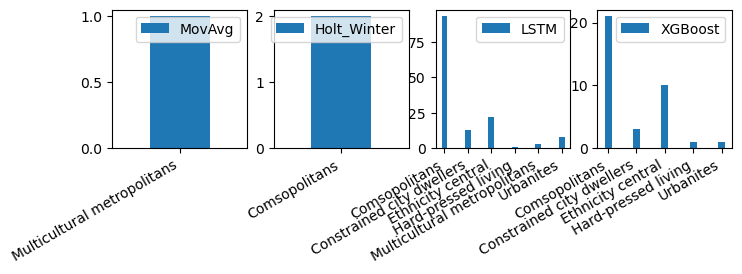

In [90]:
fig,axs = plt.subplots(1,4)
plt.style.use('default')

loc_landuse.loc[loc_landuse.best == 'avg'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,1.8),ax = axs[(0)],width = 0.4).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')
axs[(0)].legend().get_texts()[0].set_text('MovAvg')
axs[0].set_xlabel('')

loc_landuse.loc[loc_landuse.best== 'Holt_Winter'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)],width = 0.4).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')
axs[(1)].legend().get_texts()[0].set_text('Holt_Winter')
axs[1].set_xlabel('')

loc_landuse.loc[loc_landuse.best == 'LSTM'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(2)],width = 0.25).set_xticklabels(axs[(2)].get_xticklabels(),rotation=30, ha='right')
axs[(2)].legend().get_texts()[0].set_text('LSTM')
axs[2].set_xlabel('')

loc_landuse.loc[loc_landuse.best == 'XGBoost'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(3)],width = 0.25).set_xticklabels(axs[(3)].get_xticklabels(),rotation=30, ha='right')
axs[(3)].legend().get_texts()[0].set_text('XGBoost')
axs[3].set_xlabel('')

Text(0.5, 0, '')

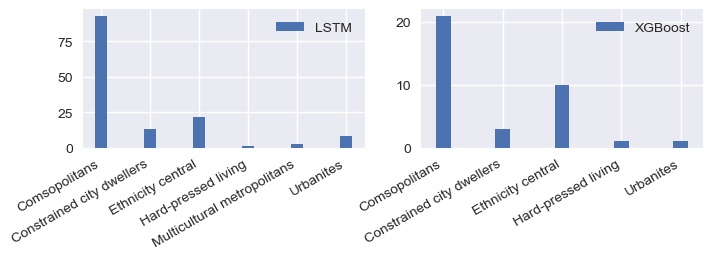

In [91]:
plt.style.use('seaborn')
fig,axs = plt.subplots(1,2)

loc_landuse.loc[loc_landuse.best == 'LSTM'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,1.8),ax = axs[(0)],width = 0.25).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')
axs[(0)].legend().get_texts()[0].set_text('LSTM')
axs[0].set_xlabel('')

loc_landuse.loc[loc_landuse.best == 'XGBoost'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)],width = 0.25).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')
axs[(1)].legend().get_texts()[0].set_text('XGBoost')
axs[1].set_xlabel('')

## Modelling Best Mothod through Random Forest Classifer

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [109]:
col = ['location', 'best', 'dist_A', 'dist_B', 'dist_Minor', 'dist_Local',
       'dist_Local_Access', 'dist_Sec_Access', 'dist_Res_Local_Access',
       'dist_Motorway', 'address', 'city', 'region', 'position',
       'SUB_REGION', 'REGION_1', 'POPULATION', 'SPRGRP', 'GRP', 'SUBGRP']
loc_meta = loc_landuse.loc[loc_landuse.sig == True][col]
loc_meta

,location,best,dist_A,dist_B,dist_Minor,dist_Local,dist_Local_Access,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway,address,city,region,position,SUB_REGION,REGION_1,POPULATION,SPRGRP,GRP,SUBGRP
0,5,LSTM,0.249989,8.183310,15.845292,0.343351,9.119249,7.121891,1.672632,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,King Street entrance,Hammersmith and Fulham,London,344.0,Ethnicity central,3d,3d1
1,6,LSTM,0.283125,8.971344,15.829665,0.085263,8.733550,6.263092,0.841378,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,Hammersmith Underground Station - Talgarth Roa...,Hammersmith and Fulham,London,344.0,Ethnicity central,3d,3d1
2,54,LSTM,0.182149,1.745995,1.577213,0.490657,9.322447,2.950578,947.071791,256.743040,"12 The Square, Market Harborough, LE16 7PA, Ea...",Market Harborough,East Midlands,,Harborough,East Midlands,278.0,Constrained city dwellers,7d,7d3
3,62,LSTM,0.154238,8.773683,15.859061,0.231139,8.933722,6.448961,1.034977,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",London,Greater London,Bus station link corridor,Hammersmith and Fulham,London,344.0,Ethnicity central,3d,3d1
4,78,LSTM,0.156842,8.516844,15.774605,0.331833,9.208406,6.805659,1.317535,52.715687,"Unit 3, Hammersmith Broadway Shopping Centre, ...",London,Greater London,Hammersmith Underground Station - King Street ...,Hammersmith and Fulham,London,344.0,Ethnicity central,3d,3d1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1117,LSTM,1.095582,4.615151,1.129827,0.183936,0.771501,0.175971,1.311650,139.559269,"184 High Street, Beckenham, BR3 1EN, Greater L...",Beckenham,Greater London,,Bromley,London,276.0,Comsopolitans,2d,2d2
175,1157,LSTM,0.039290,17.060939,3.042075,0.504838,5.715753,3.413476,95.990978,68.794327,"28-30 South Street, Dorking, RH4 2HQ, South East",Dorking,South East,,Mole Valley,South East,243.0,Constrained city dwellers,7a,7a2
176,1158,XGBoost,0.957827,18.416176,3.652482,0.386081,5.743590,2.477035,96.931160,70.015008,"78 South Street, Dorking, RH4 2HD, South East",Dorking,South East,,Mole Valley,South East,281.0,Urbanites,5a,5a1
177,1161,LSTM,1.221016,13.536819,1.894142,0.096232,3.234551,2.907094,94.147655,65.860329,"171 High Street, Dorking, RH4 1AD, South East",Dorking,South East,,Mole Valley,South East,280.0,Urbanites,5a,5a3


### Term document matrix for 'address', 'city','SPRGRP'

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
address = count_vectorizer.fit_transform(loc_meta['address'])
df_address = pd.DataFrame(address.toarray(), columns=count_vectorizer.get_feature_names())
print(df_address.shape)

(179, 467)


In [112]:
supgrp = count_vectorizer.fit_transform(loc_meta['SPRGRP'])
df_supgrp = pd.DataFrame(supgrp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_supgrp.shape)

(179, 6)


In [113]:
grp = count_vectorizer.fit_transform(loc_meta['GRP'])
df_grp = pd.DataFrame(grp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_grp.shape)

(179, 17)


In [114]:
city = count_vectorizer.fit_transform(loc_meta['city'])
df_city = pd.DataFrame(city.toarray(), columns=count_vectorizer.get_feature_names())
print(df_city.shape)

(179, 54)


In [126]:
col_corr = ['dist_A','dist_B','dist_Minor','dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
            'dist_Res_Local_Access', 'dist_Motorway']

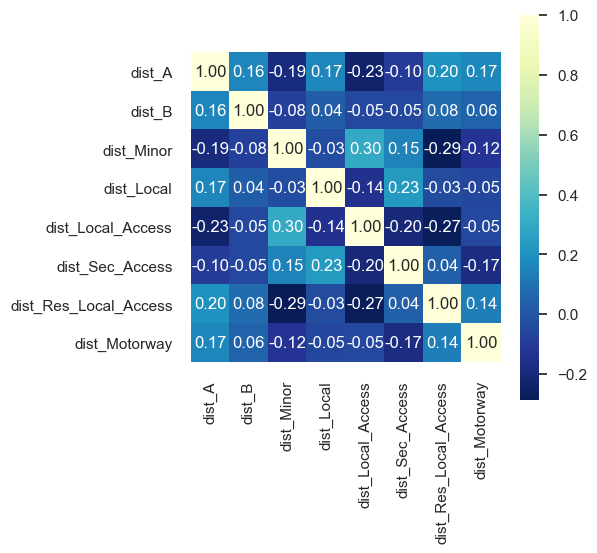

In [132]:
corr = loc_meta[col_corr].corr()
plt.figure(figsize = (5,5))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', cmap="YlGnBu_r", xticklabels=col_corr, yticklabels=col_corr)
plt.show();

### Processing and adding categorical features

In [117]:
loc_meta_select = loc_meta[['best','dist_A','dist_B','dist_Minor',
                            'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
                            'dist_Res_Local_Access', 'dist_Motorway']]

#loc_meta_select = pd.concat([loc_meta_select, df_address], axis=1, join='inner')
loc_meta_select = pd.concat([loc_meta_select, df_supgrp], axis=1, join='inner')
#loc_meta_select = pd.concat([loc_meta_select, df_grp], axis=1, join='inner')
#loc_meta_select = pd.concat([loc_meta_select, df_city], axis=1, join='inner')
#loc_meta_select = pd.concat([loc_meta_select, df_district], axis=1, join='inner')

### Encoding 'BEST METHODS'

In [118]:
factor = pd.factorize(loc_meta_select['best'])
loc_meta_select['best'] = factor[0]
definitions = factor[1]

## Random Forest Classifer

In [122]:
from sklearn.metrics import accuracy_score, classification_report

In [133]:
plt.style.use('default')

In [125]:
y = loc_meta_select['best']
x = loc_meta_select.drop('best', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state=5)
rf = RandomForestClassifier(n_estimators = 10, 
                            criterion = 'entropy', 
                            max_depth = None,
                            random_state = 3, 
                            n_jobs = 1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)

train_accuracy = accuracy_score(y_tr,y_tr_pred)
test_accuracy = accuracy_score(y_te,y_te_pred)

print('train accuracy:' + str(train_accuracy))
print('test accuracy: ' + str(test_accuracy))

train accuracy:0.9626865671641791
test accuracy: 0.8


<AxesSubplot:>

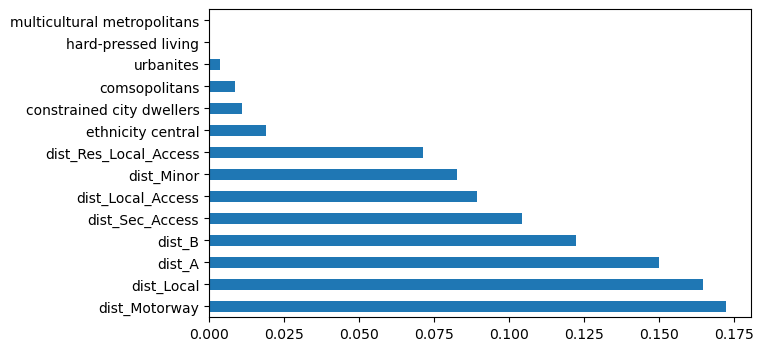

In [134]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (7,4))